# Stock Market Portfolio Optimization with Python

Este projeto foi retirado do [https://thecleverprogrammer.com/2024/07/01/stock-market-portfolio-optimization-with-python/](https://thecleverprogrammer.com/2024/07/01/stock-market-portfolio-optimization-with-python/)


## Introdução 

A otimização de portfólio de ações é o processo de selecionar a melhor combinação de ações para maximizar os retornos, minimizando os riscos, com base em dados históricos e métricas financeiras. Este artigo ensina como otimizar um portfólio de ações analisando o desempenho do mercado utilizando Python.

A otimização de portfólio envolve a análise de tendências de preços, cálculo de retornos esperados e volatilidades, e determinação das correlações entre diferentes ações para alcançar a diversificação. Usando técnicas como a Teoria Moderna de Portfólios (MPT), é possível construir um portfólio eficiente que equilibre o risco e o retorno.

Os resultados esperados incluem a identificação do portfólio com o maior índice de Sharpe, que indica o melhor retorno ajustado ao risco, proporcionando uma estratégia clara de alocação de ações para atingir objetivos de investimento a longo prazo.

## Preparando o Setup

In [93]:
!pip install yfinance

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from datetime import date, timedelta

## Preparando os Dados

In [95]:
# Definido o intervalo de tempo. Estamos usando os ultimos 365 dias 
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

print (start_date, end_date)

2023-08-18 2024-08-17


In [96]:
# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

data.head()

Price         Adj Close                                               Close  \
Ticker      HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS   
Date                                                                          
2023-08-18  1569.320190  1363.369873  2547.800049  3311.108398  1590.750000   
2023-08-21  1568.087036  1379.665771  2520.000000  3345.083496  1589.500000   
2023-08-22  1561.378662  1378.046021  2519.399902  3325.907715  1582.699951   
2023-08-23  1565.226074  1382.169067  2522.199951  3341.739990  1586.599976   
2023-08-24  1558.024536  1397.532593  2479.800049  3331.414795  1579.300049   

Price                                                     High               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS   
Date                                                                          
2023-08-18  1388.800049  2556.800049  3367.100098  1596.300049  1408.699951   
2023-08-21  1405.400024  2520.000000  3401.649902  1600.500000  1407.000000   
2023-08-22  1403.750000  2519.399902  3382.149902  1598.000000  1406.050049   
2023-08-23  1407.949951  2522.199951  3398.250000  1590.550049  1416.599976   
2023-08-24  1423.599976  2479.800049  3387.750000  1596.199951  1425.050049   

Price       ...          Low                      Open               \
Ticker      ...  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS   
Date        ...                                                       
2023-08-18  ...  2508.550049  3356.500000  1587.550049  1403.699951   
2023-08-21  ...  2515.649902  3372.000000  1600.500000  1389.750000   
2023-08-22  ...  2499.000000  3365.050049  1596.349976  1404.699951   
2023-08-23  ...  2516.949951  3376.000000  1580.000000  1416.000000   
2023-08-24  ...  2471.000000  3378.100098  1593.300049  1421.500000   

Price                                Volume                                
Ticker      RELIANCE.NS  TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
Date                                                                       
2023-08-18  2531.250000  3410.0    12816683  5134103     9319989  2526749  
2023-08-21  2539.949951  3375.0    10918635  3032722     4610873  1375579  
2023-08-22  2516.899902  3400.0    16136785  2890714     3856522  1222012  
2023-08-23  2524.199951  3388.0    18249294  2559125     4758976  1330046  
2023-08-24  2539.899902  3408.0    21572896  5171963     7070010  1152881  

[5 rows x 24 columns]

In [97]:
# reset index to bring Date into the columns for the melt function
data = data.reset_index()
data.head()

Price        Date    Adj Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2023-08-18  1569.320190  1363.369873  2547.800049  3311.108398   
1      2023-08-21  1568.087036  1379.665771  2520.000000  3345.083496   
2      2023-08-22  1561.378662  1378.046021  2519.399902  3325.907715   
3      2023-08-23  1565.226074  1382.169067  2522.199951  3341.739990   
4      2023-08-24  1558.024536  1397.532593  2479.800049  3331.414795   

Price         Close                                                High  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1590.750000  1388.800049  2556.800049  3367.100098  1596.300049  ...   
1       1589.500000  1405.400024  2520.000000  3401.649902  1600.500000  ...   
2       1582.699951  1403.750000  2519.399902  3382.149902  1598.000000  ...   
3       1586.599976  1407.949951  2522.199951  3398.250000  1590.550049  ...   
4       1579.300049  1423.599976  2479.800049  3387.750000  1596.199951  ...   

Price           Low                      Open                            \
Ticker  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0       2508.550049  3356.500000  1587.550049  1403.699951  2531.250000   
1       2515.649902  3372.000000  1600.500000  1389.750000  2539.949951   
2       2499.000000  3365.050049  1596.349976  1404.699951  2516.899902   
3       2516.949951  3376.000000  1580.000000  1416.000000  2524.199951   
4       2471.000000  3378.100098  1593.300049  1421.500000  2539.899902   

Price               Volume                                
Ticker  TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
0       3410.0    12816683  5134103     9319989  2526749  
1       3375.0    10918635  3032722     4610873  1375579  
2       3400.0    16136785  2890714     3856522  1222012  
3       3388.0    18249294  2559125     4758976  1330046  
4       3408.0    21572896  5171963     7070010  1152881  

[5 rows x 25 columns]

In [98]:
# To handle multi-level columns (from yfinance data), we need to flatten them
# Flatten the multi-level columns
data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in data.columns.values]
data.head()

,Date,Adj Close_HDFCBANK.NS,Adj Close_INFY.NS,Adj Close_RELIANCE.NS,Adj Close_TCS.NS,Close_HDFCBANK.NS,Close_INFY.NS,Close_RELIANCE.NS,Close_TCS.NS,High_HDFCBANK.NS,...,Low_RELIANCE.NS,Low_TCS.NS,Open_HDFCBANK.NS,Open_INFY.NS,Open_RELIANCE.NS,Open_TCS.NS,Volume_HDFCBANK.NS,Volume_INFY.NS,Volume_RELIANCE.NS,Volume_TCS.NS
0,2023-08-18,1569.320190,1363.369873,2547.800049,3311.108398,1590.750000,1388.800049,2556.800049,3367.100098,1596.300049,...,2508.550049,3356.500000,1587.550049,1403.699951,2531.250000,3410.0,12816683,5134103,9319989,2526749
1,2023-08-21,1568.087036,1379.665771,2520.000000,3345.083496,1589.500000,1405.400024,2520.000000,3401.649902,1600.500000,...,2515.649902,3372.000000,1600.500000,1389.750000,2539.949951,3375.0,10918635,3032722,4610873,1375579
2,2023-08-22,1561.378662,1378.046021,2519.399902,3325.907715,1582.699951,1403.750000,2519.399902,3382.149902,1598.000000,...,2499.000000,3365.050049,1596.349976,1404.699951,2516.899902,3400.0,16136785,2890714,3856522,1222012
3,2023-08-23,1565.226074,1382.169067,2522.199951,3341.739990,1586.599976,1407.949951,2522.199951,3398.250000,1590.550049,...,2516.949951,3376.000000,1580.000000,1416.000000,2524.199951,3388.0,18249294,2559125,4758976,1330046
4,2023-08-24,1558.024536,1397.532593,2479.800049,3331.414795,1579.300049,1423.599976,2479.800049,3387.750000,1596.199951,...,2471.000000,3378.100098,1593.300049,1421.500000,2539.899902,3408.0,21572896,5171963,7070010,1152881


In [99]:
# Melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name='Attribute_Ticker', value_name='Value')
data_melted.head()

,Date,Attribute_Ticker,Value
0,2023-08-18,Adj Close_HDFCBANK.NS,1569.320190
1,2023-08-21,Adj Close_HDFCBANK.NS,1568.087036
2,2023-08-22,Adj Close_HDFCBANK.NS,1561.378662
3,2023-08-23,Adj Close_HDFCBANK.NS,1565.226074
4,2023-08-24,Adj Close_HDFCBANK.NS,1558.024536


In [100]:
# Split the 'Attribute_Ticker' into separate 'Attribute' and 'Ticker' columns
data_melted[['Attribute', 'Ticker']] = data_melted['Attribute_Ticker'].str.rsplit('_', n=1, expand=True)
data_melted.head()

,Date,Attribute_Ticker,Value,Attribute,Ticker
0,2023-08-18,Adj Close_HDFCBANK.NS,1569.320190,Adj Close,HDFCBANK.NS
1,2023-08-21,Adj Close_HDFCBANK.NS,1568.087036,Adj Close,HDFCBANK.NS
2,2023-08-22,Adj Close_HDFCBANK.NS,1561.378662,Adj Close,HDFCBANK.NS
3,2023-08-23,Adj Close_HDFCBANK.NS,1565.226074,Adj Close,HDFCBANK.NS
4,2023-08-24,Adj Close_HDFCBANK.NS,1558.024536,Adj Close,HDFCBANK.NS


In [101]:
# Pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')
data_pivoted.head()

Attribute                 Adj Close        Close         High          Low  \
Date       Ticker                                                            
2023-08-18 HDFCBANK.NS  1569.320190  1590.750000  1596.300049  1585.500000   
           INFY.NS      1363.369873  1388.800049  1408.699951  1386.150024   
           RELIANCE.NS  2547.800049  2556.800049  2577.600098  2508.550049   
           TCS.NS       3311.108398  3367.100098  3410.000000  3356.500000   
2023-08-21 HDFCBANK.NS  1568.087036  1589.500000  1600.500000  1587.000000   

Attribute                      Open      Volume  
Date       Ticker                                
2023-08-18 HDFCBANK.NS  1587.550049  12816683.0  
           INFY.NS      1403.699951   5134103.0  
           RELIANCE.NS  2531.250000   9319989.0  
           TCS.NS       3410.000000   2526749.0  
2023-08-21 HDFCBANK.NS  1600.500000  10918635.0

In [102]:
# Reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()
stock_data.head()

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-08-18,HDFCBANK.NS,1569.320190,1590.750000,1596.300049,1585.500000,1587.550049,12816683.0
1,2023-08-18,INFY.NS,1363.369873,1388.800049,1408.699951,1386.150024,1403.699951,5134103.0
2,2023-08-18,RELIANCE.NS,2547.800049,2556.800049,2577.600098,2508.550049,2531.250000,9319989.0
3,2023-08-18,TCS.NS,3311.108398,3367.100098,3410.000000,3356.500000,3410.000000,2526749.0
4,2023-08-21,HDFCBANK.NS,1568.087036,1589.500000,1600.500000,1587.000000,1600.500000,10918635.0


## Gráfico 

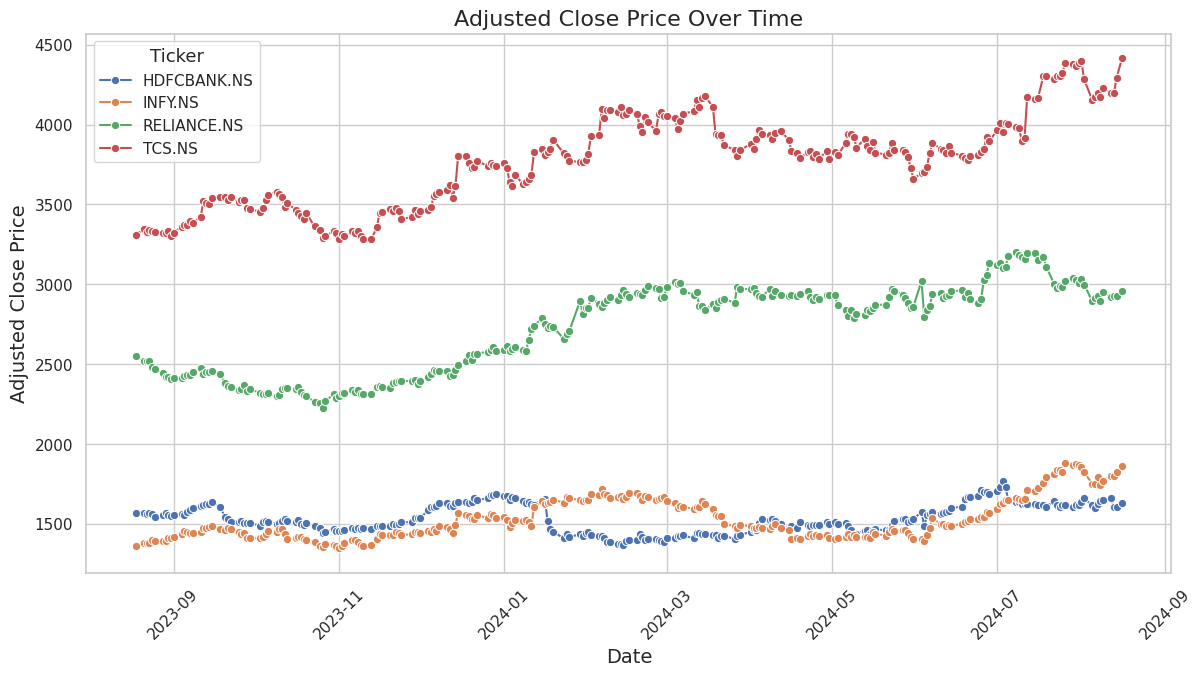

In [103]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

## Média Móvel  e Volume

Agora, vamos calcular as médias móveis de 50 e 200 dias e plotá-las junto com o preço de fechamento ajustado para cada ação:

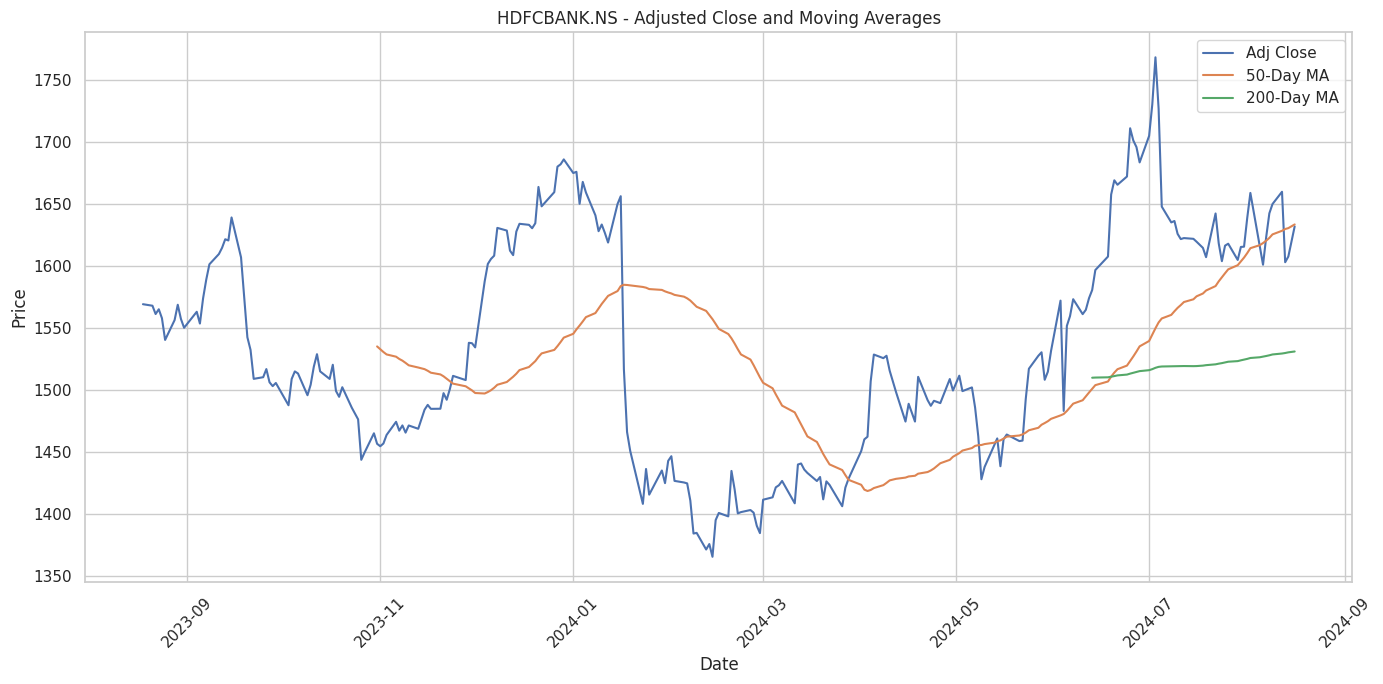

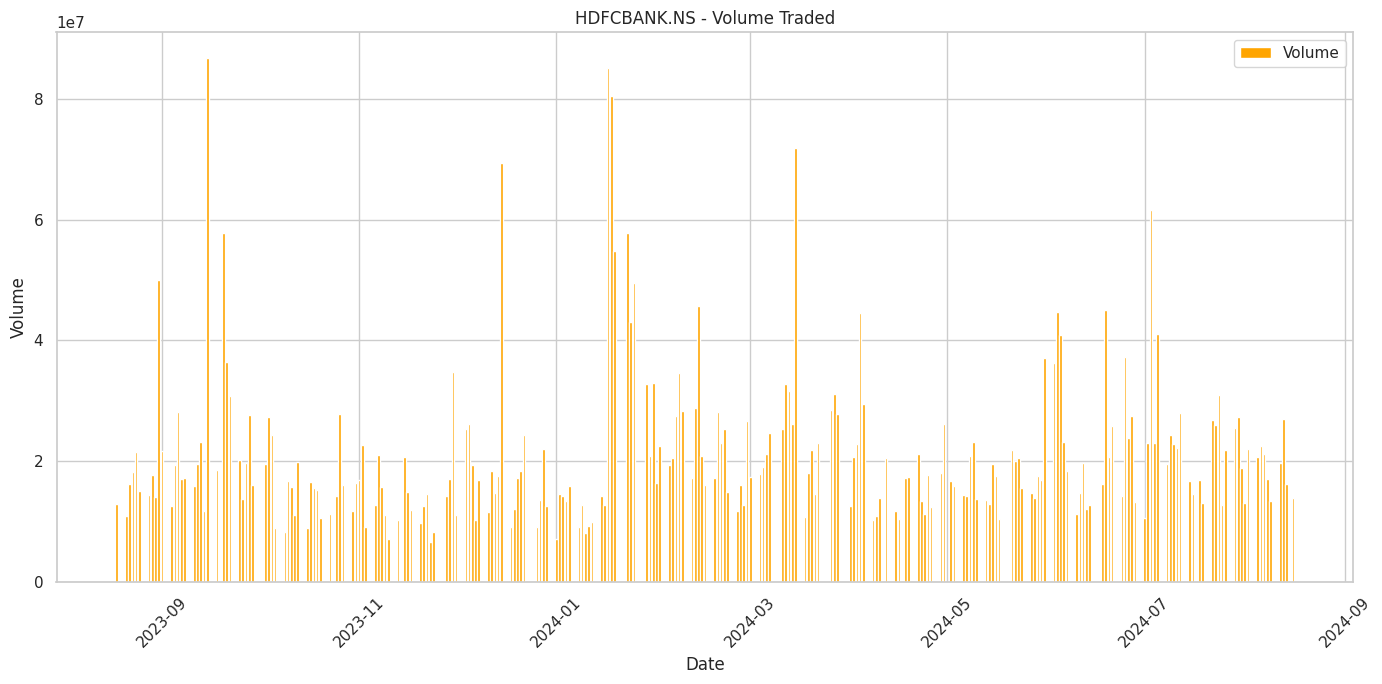

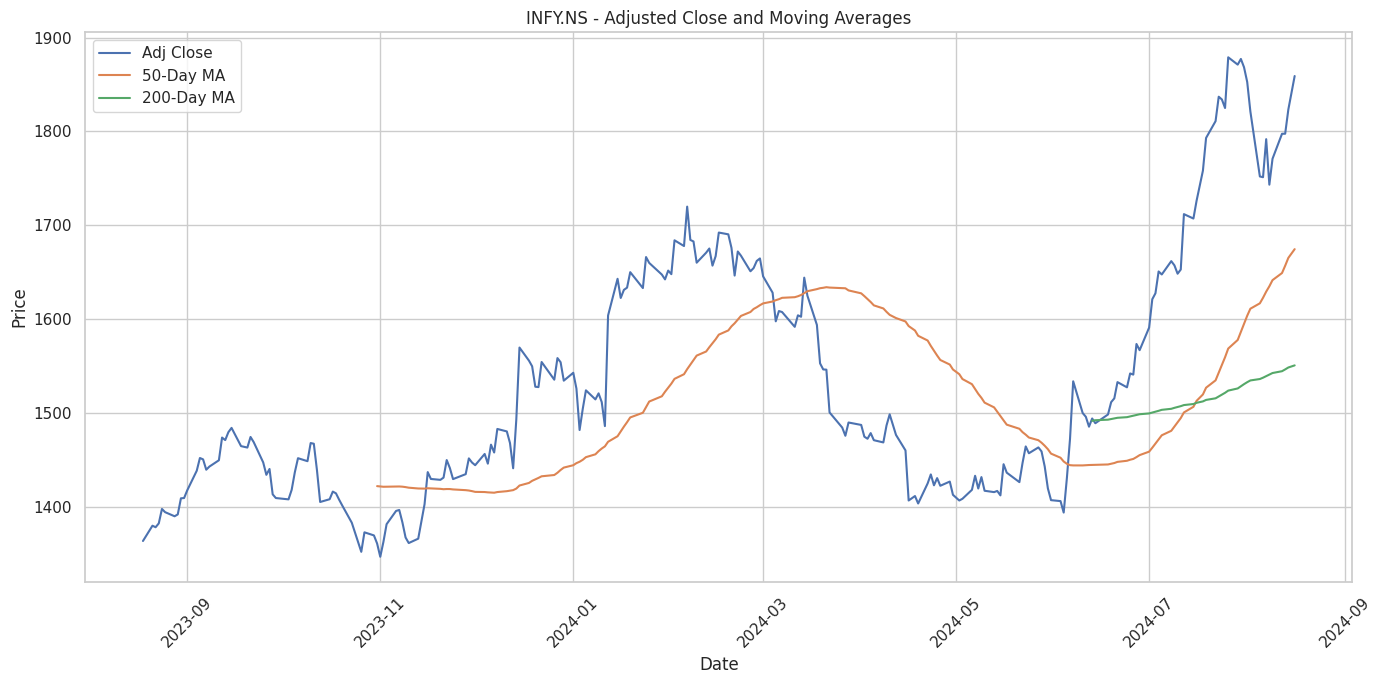

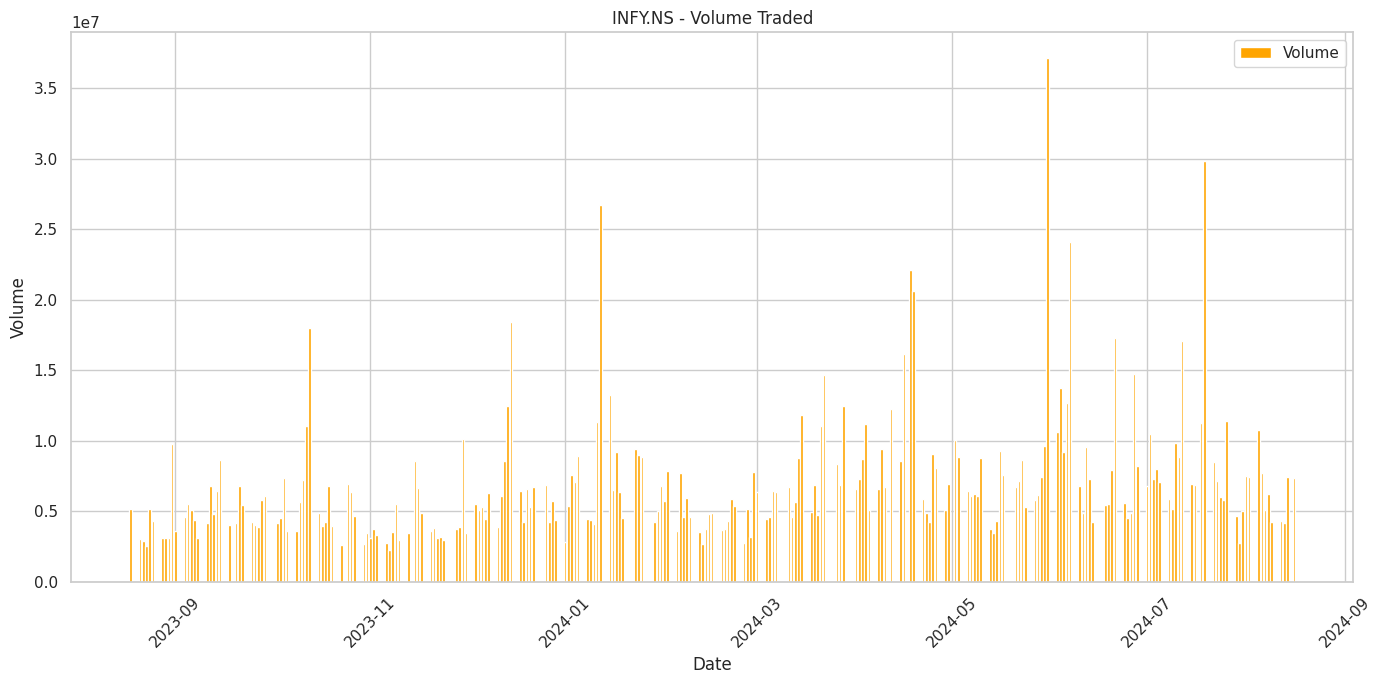

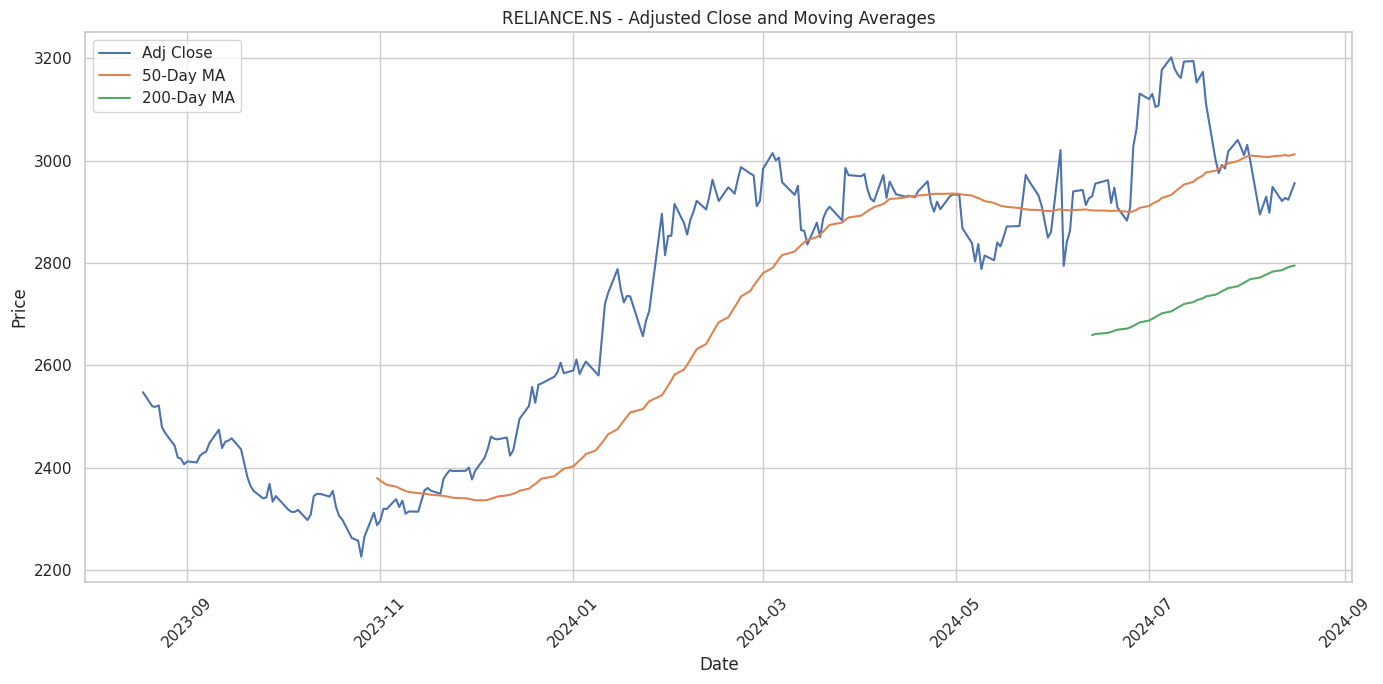

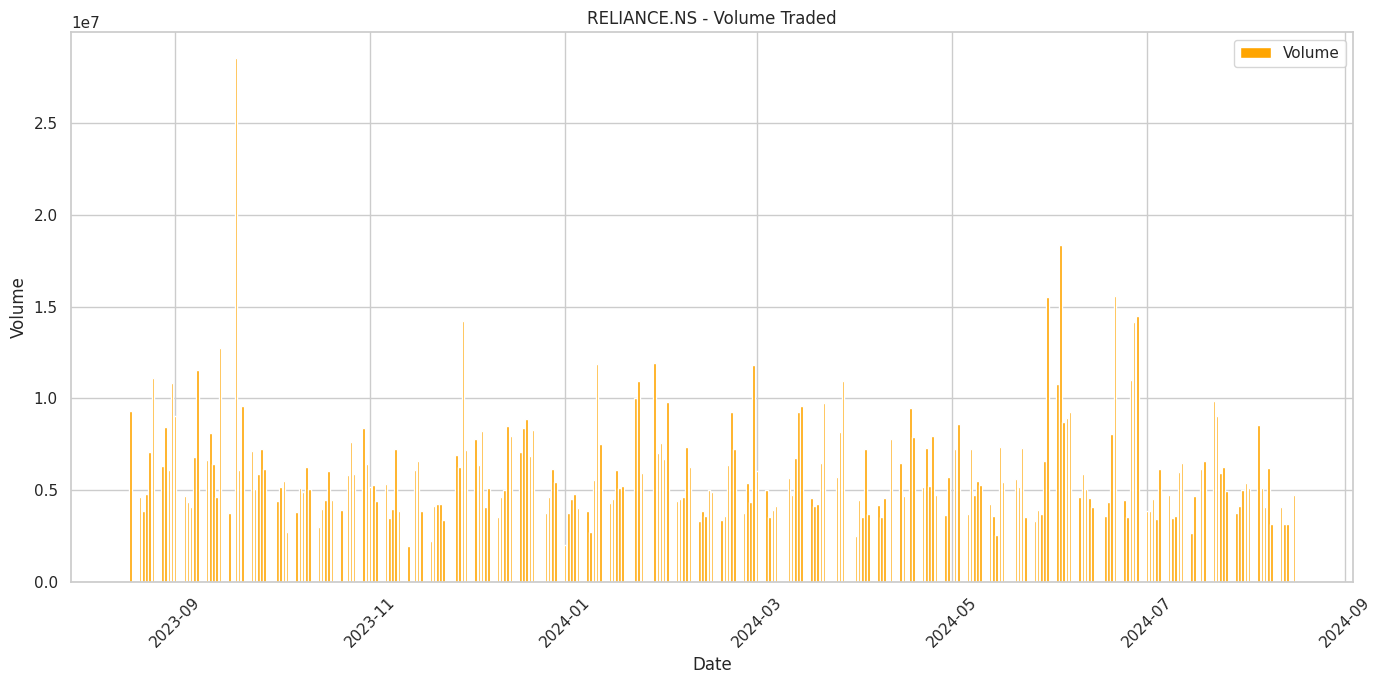

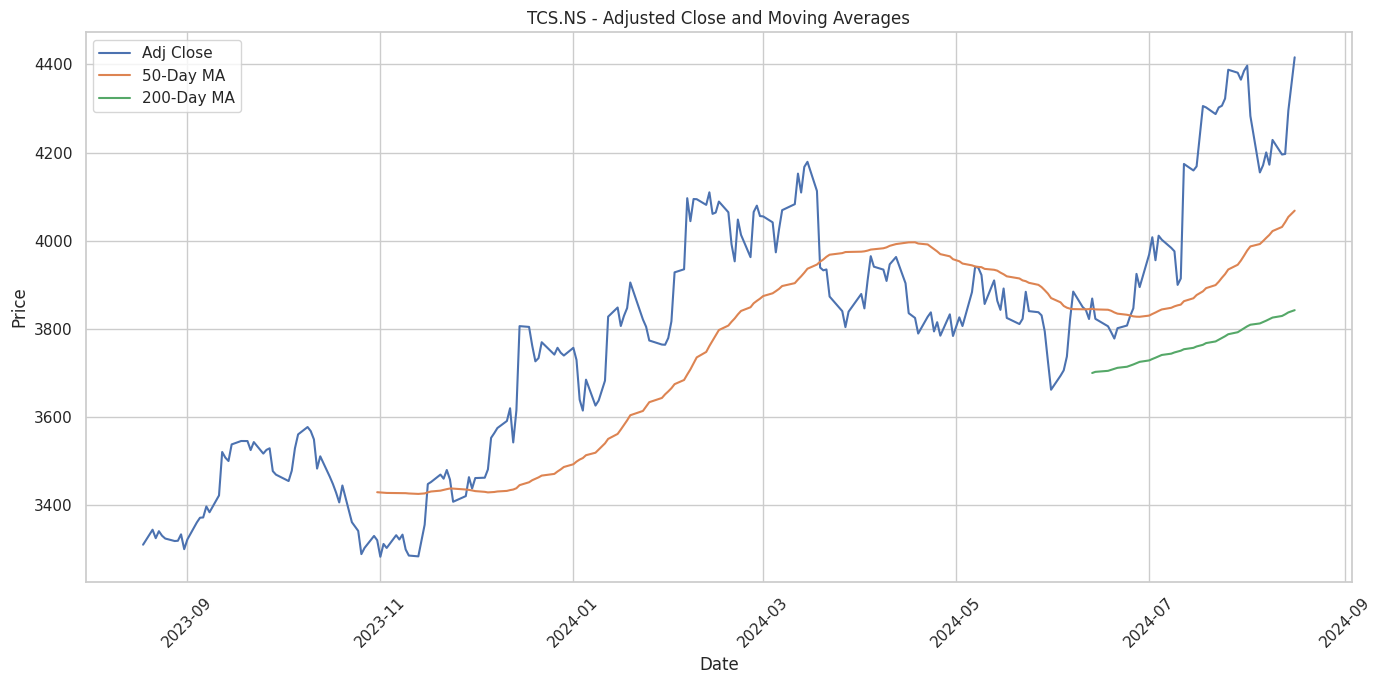

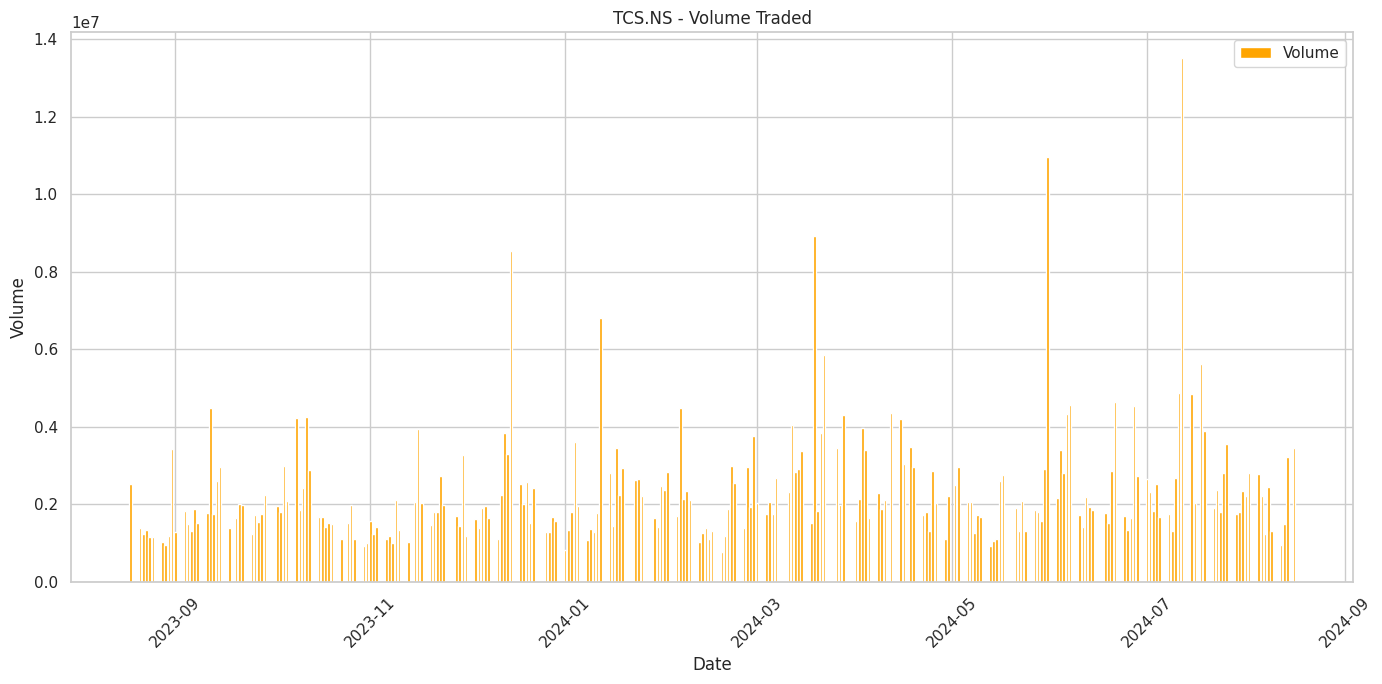

In [104]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Crossovers (Cruzamentos): Um dos métodos mais comuns para gerar sinais de compra e venda é observar os cruzamentos entre diferentes médias móveis. Por exemplo:

- Cruzamento de Média Móvel Curta sobre Média Longa: Quando uma média móvel curta (como a de 50 dias) cruza acima de uma média móvel longa (como a de 200 dias), isso pode ser um sinal de compra.

- Cruzamento de Média Móvel Curta abaixo de Média Longa: O inverso pode ser um sinal de venda.

Confirmação de Tendência: Os cruzamentos também podem confirmar a continuidade ou a reversão de uma tendência, ajudando a tomar decisões mais informadas.

A análise de volume é uma técnica utilizada no mercado financeiro para avaliar a força de uma tendência e confirmar padrões de preço. O volume de negociação refere-se ao número de ações, contratos ou unidades de um ativo negociadas em um período de tempo específico, geralmente em um único dia. Ao estudar o volume, os investidores e traders podem obter informações valiosas sobre a demanda e a oferta de um ativo, ajudando a identificar potenciais reversões de tendência, confirmações de movimentos de preço e a força subjacente do mercado.

### Importância da Análise de Volume

1. **Confirmação de Tendências**
   - **Tendências de Alta:** Um aumento no volume durante uma tendência de alta sugere que mais investidores estão comprando o ativo, o que pode indicar que a tendência de alta é forte e provavelmente continuará.
   - **Tendências de Baixa:** Da mesma forma, um aumento no volume durante uma tendência de baixa indica que a venda é forte, sugerindo que a tendência de baixa pode continuar.

2. **Identificação de Reversões**
   - **Volume Crescente em Reversão:** Um aumento significativo no volume após um movimento prolongado de alta ou baixa pode sinalizar uma reversão iminente. Por exemplo, se o preço de uma ação sobe, mas o volume começa a cair, isso pode indicar que o interesse está diminuindo e uma reversão de baixa pode ocorrer.
   - **Volume Divergente:** Quando o preço está subindo, mas o volume está caindo, ou vice-versa, isso pode ser um sinal de alerta de que a tendência está enfraquecendo e uma reversão pode estar se aproximando.

3. **Confirmação de Quebra (Breakout)**
   - **Breakout de Suporte/Resistência:** Quando o preço rompe uma linha de suporte ou resistência com volume alto, isso pode ser visto como uma confirmação do breakout. Se o volume é baixo durante o breakout, pode indicar uma falsa quebra, sugerindo que o movimento de preço pode não ser sustentável.

4. **Divergência entre Preço e Volume**
   - **Divergência de Alta:** Ocorre quando o preço de um ativo cai, mas o volume aumenta. Isso pode indicar que, apesar da queda de preço, há forte interesse comprador, o que pode sinalizar uma reversão para cima.
   - **Divergência de Baixa:** Ocorre quando o preço sobe, mas o volume diminui. Isso pode sugerir que o interesse na alta está diminuindo, o que pode preceder uma reversão para baixo.

5. **Volume em Padrões Gráficos**
   - **Triângulos, Bandeiras, Cunhas:** O volume pode ajudar a confirmar a validade desses padrões de continuação ou reversão. Por exemplo, em um padrão de triângulo ascendente, um aumento de volume na quebra acima da resistência confirma a continuação da tendência de alta.

### Indicadores de Volume Populares

1. **Volume On-Balance (OBV)**
   - O OBV é um indicador que acumula volume positivo e negativo para confirmar a direção de uma tendência. Se o OBV está subindo, confirma uma tendência de alta, enquanto uma queda no OBV confirma uma tendência de baixa.

2. **Volume Relative Strength Index (RSI)**
   - O Volume RSI é uma variação do RSI tradicional que incorpora o volume na sua fórmula. Ele mede a velocidade e a mudança dos movimentos de volume, fornecendo sinais de sobrecompra ou sobrevenda.

3. **Volume Weighted Average Price (VWAP)**
   - O VWAP é uma média ponderada pelo volume que ajuda a identificar o preço médio em que um ativo foi negociado durante o dia. Ele é utilizado para confirmar tendências intradiárias e definir níveis de suporte e resistência.

4. **Volume Oscillator**
   - Este indicador mede a diferença percentual entre duas médias móveis do volume. Um volume oscillator crescente pode indicar aumento de força da tendência, enquanto um volume oscillator decrescente pode sinalizar fraqueza.

### Conclusão

A análise de volume é uma ferramenta poderosa na análise técnica, fornecendo insights importantes sobre a força e a validade das tendências e dos movimentos de preço. Ao integrar a análise de volume com outros indicadores técnicos, os investidores podem melhorar significativamente suas decisões de compra e venda, identificar reversões potenciais e confirmar breakouts. Ela é essencial para entender a dinâmica da oferta e demanda no mercado e tomar decisões mais informadas.

## Distribuição normal 

Se o histograma dos retornos diários se alinha bem com a curva de distribuição normal, isso sugere que os retornos podem ser normalmente distribuídos.

Este procedimento ajuda a entender melhor as características dos retornos de uma ação e é um passo importante na modelagem financeira e na análise de risco.

<function matplotlib.pyplot.show(close=None, block=None)>

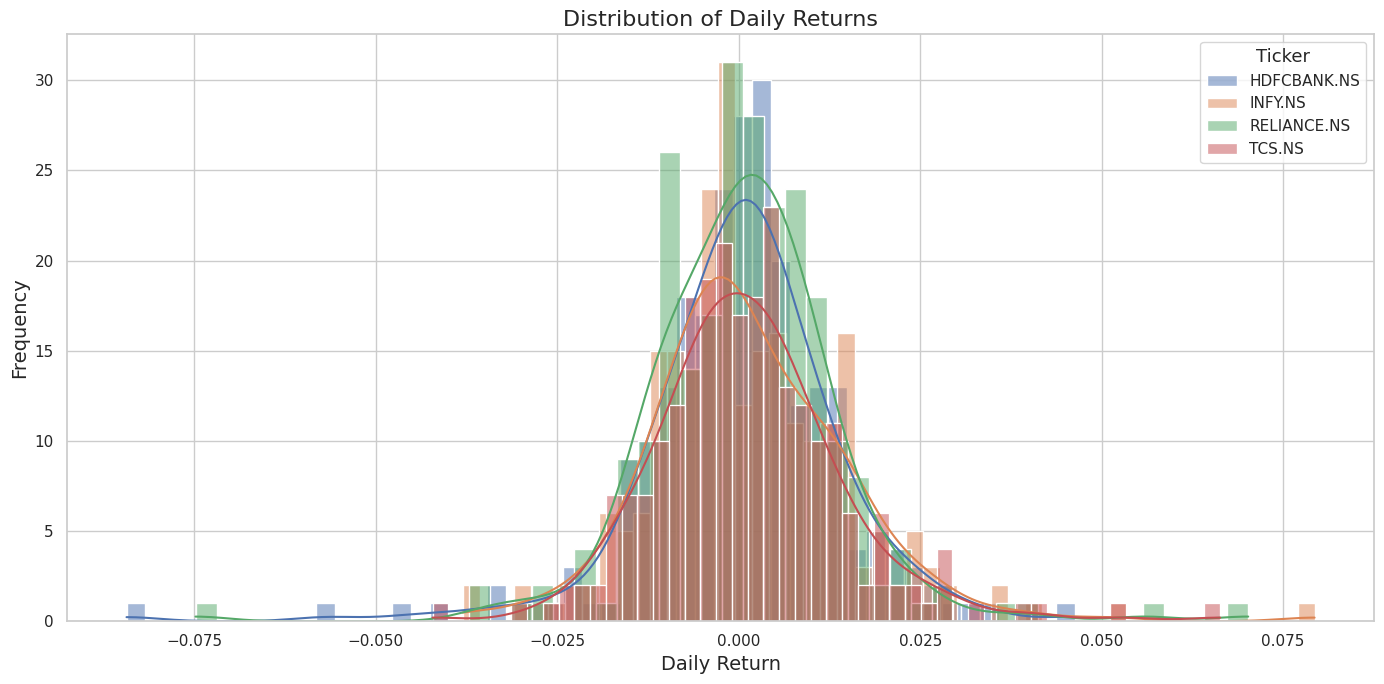

In [105]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show

## Correlação 

A correlação é uma ferramenta essencial para entender as relações entre diferentes ativos financeiros. Usada corretamente, pode ajudar a mitigar riscos, melhorar a diversificação e informar decisões de investimento. No entanto, deve ser aplicada com cautela e em conjunto com outras análises para uma visão completa do mercado.

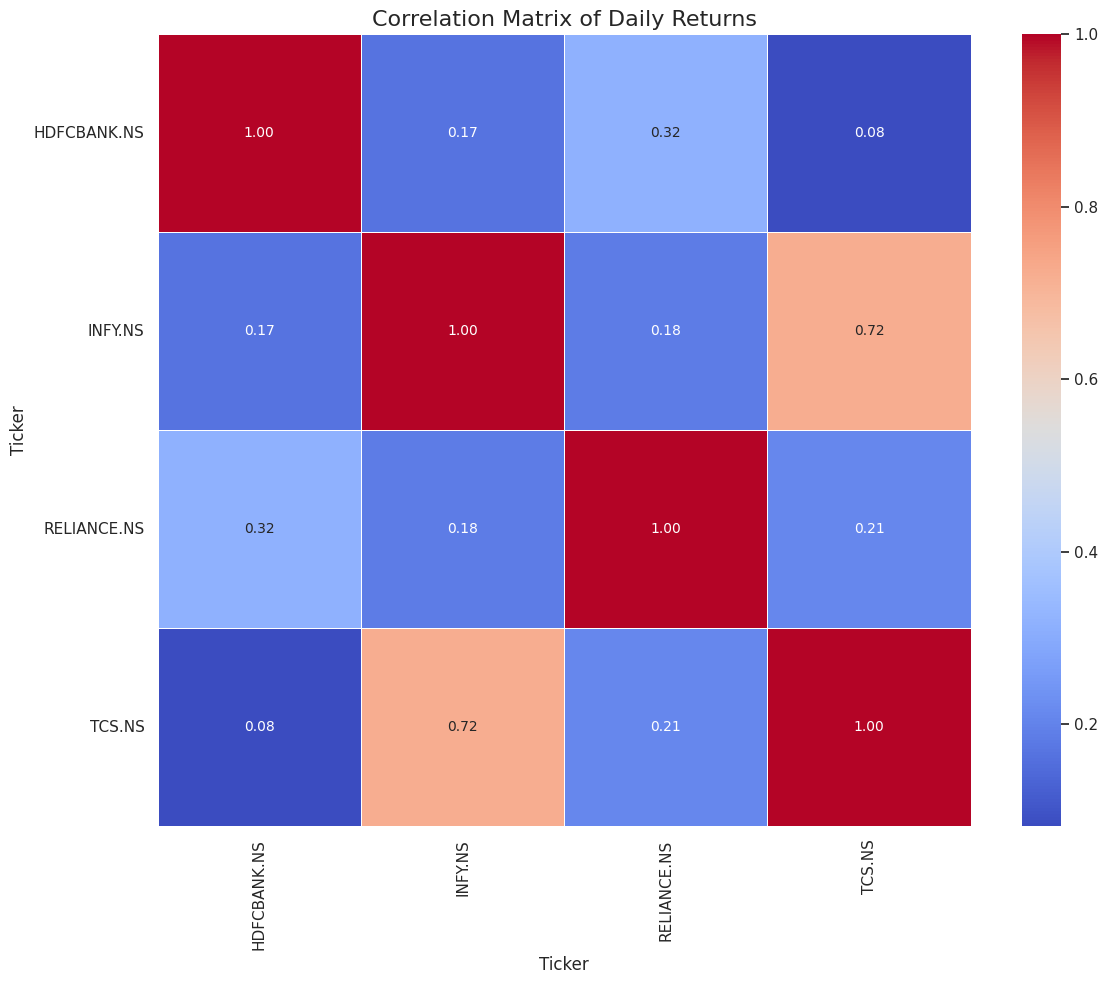

In [106]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Otimização de portfólio

### calculo o retorno esperado e a volatilidade anualizada

- expected_returns: Mostra o retorno esperado anualizado, estimando quanto você pode esperar ganhar em um ano com base no comportamento passado do ativo.
- volatility: Mostra a volatilidade anualizada, indicando o risco associado ao ativo, ou seja, quanto o retorno pode variar ao longo do tempo.
- stock_stats: Combina essas informações em um DataFrame, facilitando a análise comparativa entre diferentes ativos.
- daily_returns.mean(): Calcula a média dos retornos diários para cada ativo.
-  252: Multiplica a média diária por 252 para anualizar o retorno. O número 252 é usado porque é o número aproximado de dias de negociação em um ano.


In [107]:
expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.064752,0.217765
INFY.NS,0.347161,0.221005
RELIANCE.NS,0.177612,0.213475
TCS.NS,0.321141,0.206703


### Função portfolio_performance

Essa função calcula o retorno e a volatilidade (risco) de um portfólio dado um conjunto de pesos para os ativos.

- weights: É um vetor com os pesos (proporção de investimento) de cada ativo no portfólio.
- returns: É um vetor com os retornos esperados de cada ativo.
- cov_matrix: É a matriz de covariância dos retornos dos ativos, que indica como os retornos dos ativos se movem em relação aos outros.

O retorno do portfólio é calculado multiplicando os pesos pelos retornos esperados dos ativos (np.dot(weights, returns)).

A volatilidade do portfólio é calculada usando a matriz de covariância dos retornos. Ela indica o risco do portfólio considerando as correlações entre os ativos.

In [108]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

### Configuração da Simulação

Aqui, você está configurando a simulação:

- num_portfolios: Define o número de portfólios a serem simulados (10.000 neste caso).
- results: Um array para armazenar os resultados das simulações (retorno, volatilidade e Índice de Sharpe).
- cov_matrix: A matriz de covariância é ajustada para refletir a volatilidade anualizada, multiplicando a matriz de covariância diária por 252 (número aproximado de dias de negociação em um ano).
- np.random.seed(42): Fixa a semente do gerador de números aleatórios para garantir que os resultados sejam reproduzíveis.


In [109]:
# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

### Simulação de Portfólios

Para cada iteração do loop (10.000 vezes):
- weights: Um vetor de pesos aleatórios é gerado para os ativos. Os pesos são normalizados para somarem 1, garantindo que todo o capital seja investido.
- portfolio_return, portfolio_volatility: A função portfolio_performance calcula o retorno e a volatilidade para o portfólio gerado.
- Os resultados são armazenados no array results:
    - results[0,i]: Retorno do portfólio.
    - results[1,i]: Volatilidade do portfólio.
    - results[2,i]: Índice de Sharpe (razão entre retorno e risco).

In [110]:
for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

### Plotagem da Fronteira Eficiente

o código gera um gráfico da Fronteira Eficiente:

- plt.scatter: Cria um gráfico de dispersão onde cada ponto representa um portfólio.
- Eixo X: Volatilidade (risco).
- Eixo Y: Retorno esperado.
- Cor dos pontos: Índice de Sharpe (quanto mais alto, melhor o trade-off entre risco e retorno).

O gráfico resultante mostra a fronteira eficiente, que é o conjunto de portfólios que oferecem o melhor retorno para um dado nível de risco.

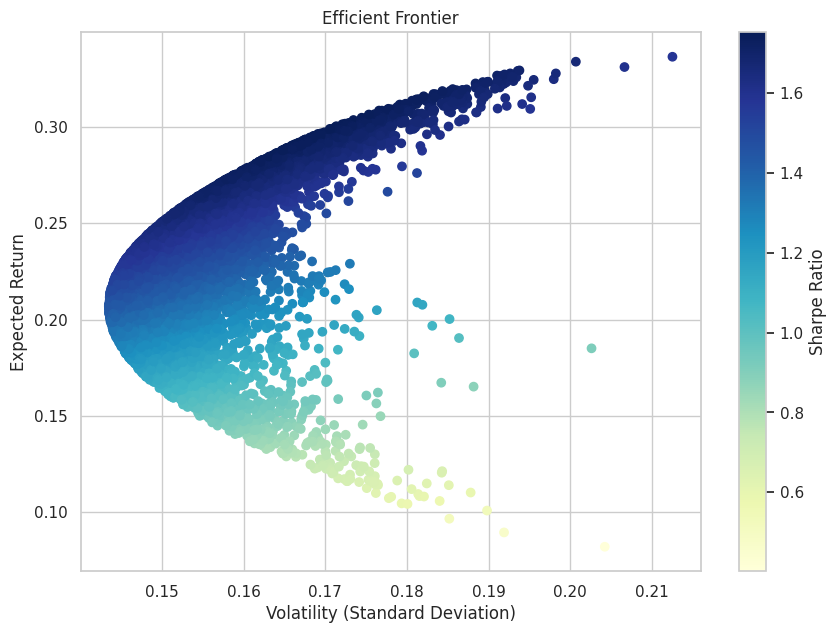

In [111]:
plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [112]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.3002889770979362, 0.17133420956709997, 1.7526504359909132)

Este comando retorna uma tupla contendo os três valores:

- max_sharpe_return: O retorno esperado do portfólio que tem o melhor índice de Sharpe.
- max_sharpe_volatility: A volatilidade (risco) associada a esse portfólio.
- max_sharpe_ratio: O índice de Sharpe máximo encontrado entre os portfólios simulados.

### Identificação dos Pesos do Portfólio 

- max_sharpe_weights: Inicializa um vetor de zeros com o mesmo comprimento do número de ativos no portfólio (unique_tickers). Este vetor armazenará os pesos dos ativos para o portfólio com o maior Índice de Sharpe.

- O loop itera sobre todos os portfólios simulados:
    - weights: Gera um vetor de pesos aleatórios para os ativos.
    - weights /= np.sum(weights): Normaliza os pesos para que a soma seja 1 (o portfólio é completamente investido).
    - portfolio_performance: Calcula o retorno e a volatilidade para o portfólio com os pesos atuais.
    - if results[2, i] == max_sharpe_ratio: Verifica se o Índice de Sharpe para o portfólio atual é o máximo encontrado. Se for, atualiza max_sharpe_weights com os pesos desse portfólio e interrompe o loop com break.


- Cria um DataFrame portfolio_weights_df com duas colunas:
    - Ticker: Os símbolos dos ativos.
    - Weight: Os pesos correspondentes para o portfólio com o maior Índice de Sharpe.


In [113]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.170159
1,INFY.NS,0.191942
2,RELIANCE.NS,0.481267
3,TCS.NS,0.156633


O peso representa a porcentagem que deve ser investido em cada ações. 